# Introduction to TensorFlow in Python
#### Course Description
Not long ago, cutting-edge computer vision algorithms couldn’t differentiate between images of cats and dogs. Today, a skilled data scientist equipped with nothing more than a laptop can classify tens of thousands of objects with greater accuracy than the human eye. In this course, you will use TensorFlow 2.1 to develop, train, and make predictions with the models that have powered major advances in recommendation systems, image classification, and FinTech. You will learn both high-level APIs, which will enable you to design and train deep learning models in 15 lines of code, and low-level APIs, which will allow you to move beyond off-the-shelf routines. You will also learn to accurately predict housing prices, credit card borrower defaults, and images of sign language gestures.

In [1]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

constant = tf.constant

# 1. Introduction to TensorFlow

Before you can build advanced models in TensorFlow 2.0, you will first need to understand the basics. In this chapter, you’ll learn how to define constants and variables, perform tensor addition and multiplication, and compute derivatives. Knowledge of linear algebra will be helpful, but not necessary.

### Defining data as constants
Throughout this course, we will use tensorflow version 2.1 and will exclusively import the submodules needed to complete each exercise. This will usually be done for you, but you will do it in this exercise by importing constant from tensorflow.

After you have imported constant, you will use it to transform a numpy array, credit_numpy, into a tensorflow constant, credit_constant. This array contains feature columns from a dataset on credit card holders and is previewed in the image below. We will return to this dataset in later chapters.

Note that tensorflow version 2.0 allows you to use data as either a numpy array or a tensorflow constant object. Using a constant will ensure that any operations performed with that object are done in tensorflow.

This image shows four feature columns from a dataset on credit card default: education, marriage, age, and bill amount.

#### Instructions

- Import the constant submodule from the tensorflow module.
- Convert the credit_numpy array into a constant object in tensorflow. Do not set the data type.

In [2]:
credit_numpy = pd.read_csv('data/uci_credit_card.csv').iloc[:,:4]
credit_numpy = credit_numpy.to_numpy()


In [3]:
# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The datatype is: <dtype: 'float64'>
The shape is: (30000, 4)


### Defining variables
Unlike a constant, a variable's value can be modified. This will be quite useful when we want to train a model by updating its parameters. Constants can't be used for this purpose, so variables are the natural choice.

Let's try defining and working with a variable. Note that Variable(), which is used to create a variable tensor, has been imported from tensorflow and is available to use in the exercise.

#### Instructions

- Define a variable, A1, as the 1-dimensional tensor: [1, 2, 3, 4].
- Print A1. Do not use the .numpy() method. What did this tell you?
- Apply .numpy() to A1 and assign it to B1.
- Print B1. What did this tell you?

In [4]:
Variable =  tf.Variable
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


### Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the ⊙ symbol, is shown below:

$
\begin{bmatrix}
1&2 \\ 2&1 
\end{bmatrix} 
\odot
\begin{bmatrix}
3&2 \\ 1&5
\end{bmatrix} = 
\begin{bmatrix}
3 & 4 \\ 2 & 5
\end{bmatrix} 
$

In this exercise, you will perform element-wise multiplication, paying careful attention to the shape of the tensors you multiply. Note that multiply(), constant(), and ones_like() have been imported for you.

### Instructions

-  Define the tensors A1 and A23 as constants.
-  Set B1 to be a tensor of ones with the same shape as A1.
-  Set B23 to be a tensor of ones with the same shape as A23.
-  Set C1 and C23 equal to the element-wise products of A1 and B1, and A23 and B23, respectively.

In [5]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# Perform element-wise multiplication
C1 = tf.multiply(A1,B1)
C23 = tf.multiply(A23,B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


### Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.

<img src="im1.JPG" width=200 />

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill. Note that we have imported matmul() and constant().

#### Instructions

- Define features, params, and bill as constants.
- Compute the predicted value vector, billpred, by multiplying the input data, features, by the parameters, params. Use matrix multiplication, rather than the element-wise product.
- Define error as the targets, bill, minus the predicted values, billpred.

In [6]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


### Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays gray_tensor and color_tensor. Reshape these arrays into 1-dimensional vectors using the reshape operation, which has been imported for you from tensorflow. Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3.

This figure shows grayscale and color images of the sign language letter "A".

#### Instructions

- Reshape gray_tensor from a 28x28 matrix into a 784x1 vector named gray_vector.
- Reshape color_tensor from a 28x28x3 tensor into a 2352x1 vector named color_vector.

In [7]:
from arrays import *

In [8]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

### Optimizing with gradients
You are given a loss function, y=x2, which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

<img src="gradient_plot.png" width=300 />


The image shows a plot of y equals x squared. It also shows the gradient at x equals -1, x equals 0, and x equals 1.

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. The following operations are available: GradientTape(), multiply(), and Variable().

#### Instructions

- Define x as a variable with the initial value x0.
- Set the loss function, y, equal to x multiplied by x. Do not make use of operator overloading.
- Set the function to return the gradient of y with respect to x.
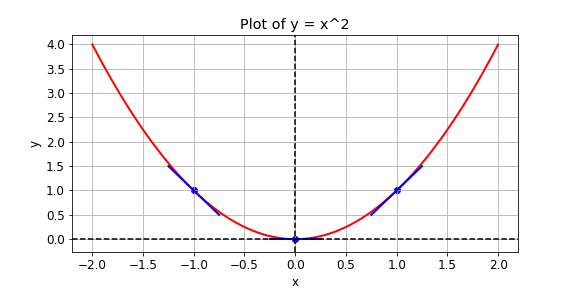

In [9]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = x*x
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


### Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, letter. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, model, which can be used to classify letter.

The 3x3 tensor, letter, and the 1x3 tensor, model, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, model is a collection of weights, arranged in a tensor.

Note that the functions reshape(), matmul(), and reduce_sum() have been imported from tensorflow and are available for use.

#### Instructions

- The model, model, is 1x3 tensor, but should be a 3x1. Reshape model.
- Perform a matrix multiplication of the 3x3 tensor, letter, by the 3x1 tensor, model.
- Sum over the resulting tensor, output, and assign this value to prediction.
- Print prediction using the .numpy() method to determine whether letter is K.

In [10]:
letter = np.array([[1., 0., 1.], [1., 1., 0.], [1., 0., 1.]])
model = np.array([[ 1.,  0., -1.]])

In [11]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


# 2. Linear models

In this chapter, you will learn how to build, solve, and make predictions with models in TensorFlow 2.0. You will focus on a simple class of models – the linear regression model – and will try to predict housing prices. By the end of the chapter, you will know how to load and manipulate data, construct loss functions, perform minimization, make predictions, and reduce resource use with batch training.

### Load data using pandas
Before you can train a machine learning model, you must first import data. There are several valid ways to do this, but for now, we will use a simple one-liner from pandas: pd.read_csv(). Recall from the video that the first argument specifies the path or URL. All other arguments are optional.

In this exercise, you will import the King County housing dataset, which we will use to train a linear model later in the chapter.

#### Instructions

- Import pandas under the alias pd.
- Assign the path to a string variable with the name data_path.
- Load the dataset as a pandas dataframe named housing.
- Print the price column of housing.

In [12]:
# Assign the path to a string variable named data_path
data_path = 'data/kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing.price)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


### Setting the data type
In this exercise, you will both load data and set its type. Note that housing is available and pandas has been imported as pd. You will import numpy and tensorflow, and define tensors that are usable in tensorflow using columns in housing with a given data type. Recall that you can select the price column, for instance, from housing using housing['price'].

#### Instructions

- Import numpy and tensorflow under their standard aliases.
- Use a numpy array to set the tensor price to have a data type of 32-bit floating point number
- Use the tensorflow function cast() to set the tensor waterfront to have a - Boolean data type.
- Print price and then waterfront. Did you notice any important differences?

In [13]:

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


### Loss functions in TensorFlow
In this exercise, you will compute the loss using data from the King County housing dataset. You are given a target, price, which is a tensor of house prices, and predictions, which is a tensor of predicted house prices. You will evaluate the loss function and print out the value of the loss.

#### Instructions
- Import the keras module from tensorflow. Then, use price and predictions to compute the mean squared error (mse).
- Modify your code to compute the mean absolute error (mae), rather than the mean squared error (mse).

In [14]:
predictions = tf.cast(housing.predictions, tf.float32)

# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

141307270000.0
268921.97


### Modifying the loss function
In the previous exercise, you defined a tensorflow loss function and then evaluated it once for a set of actual and predicted values. In this exercise, you will compute the loss within another function called loss_function(), which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow. Note that features and targets have been defined and are available. Additionally, Variable, float32, and keras are available.

#### Instructions

- Define a variable, scalar, with an initial value of 1.0 and a type of float32.
- Define a function called loss_function(), which takes scalar, features, and targets as arguments in that order.
- Use a mean absolute error loss function.


In [15]:
targets = constant(np.array([ 2.,  4.,  6.,  8., 10.], dtype=np.float32))
features = constant(np.array([1.,2.,3.,4.,5.]), dtype=np.float32)

In [16]:
# Initialize a variable named scalar
scalar = Variable(1.0, tf.float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


### Set up a linear regression
A univariate linear regression identifies the relationship between a single feature and the target tensor. In this exercise, we will use a property's lot size and price. Just as we discussed in the video, we will take the natural logarithms of both tensors, which are available as price_log and size_log.

In this exercise, you will define the model and the loss function. You will then evaluate the loss function for two different values of intercept and slope. Remember that the predicted values are given by intercept + features*slope. Additionally, note that keras.losses.mse() is available for you. Furthermore, slope and intercept have been defined as variables.

#### Instructions

- Define a function that returns the predicted values for a linear regression using intercept, features, and slope, and without using add() or multiply().
- Complete the loss_function() by adding the model's variables, intercept and slope, as arguments.
- Compute the mean squared error using targets and predictions.

In [17]:
price_log = np.log(price)
size_log = np.log(housing.sqft_lot)

In [18]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mean_squared_error(targets,predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.448336689515
71.86728197085229


### Train a linear model
In this exercise, we will pick up where the previous exercise ended. The intercept and slope, intercept and slope, have been defined and initialized. Additionally, a function has been defined, loss_function(intercept, slope), which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.

#### Instructions

- Initialize an Adam optimizer as opt with a learning rate of 0.5.
- Apply the .minimize() method to the optimizer.
- Pass loss_function() with the appropriate arguments as a lambda function to .minimize().
- Supply the list of variables that need to be updated to var_list.

In [19]:
def plot_results(intercept, slope):
        size_range = np.linspace(6,14,100)
        price_pred = [intercept+slope*s for s in size_range]
        plt.scatter(size_log, price_log, color = 'black')
        plt.plot(size_range, price_pred, linewidth=3.0, color='red')
        plt.xlabel('log(size)')
        plt.ylabel('log(price)')
        plt.title('Scatterplot of data and fitted regression line')
        plt.show()

9.681749
11.737402
1.1300178
1.6701479
0.8092006
0.812697
0.6221346
0.6119664
0.5934977
0.5704044


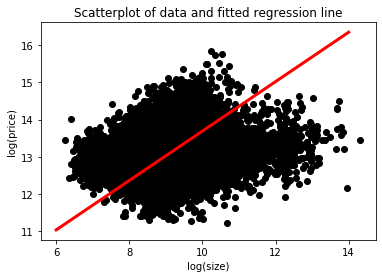

In [20]:
intercept = Variable(5.)
slope = Variable(0.001)
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

### Multiple linear regression
In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use price_log as your target and size_log and bedrooms as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: keras.losses.mae(). Finally, the predicted values are computed as follows: params[0] + feature1*params[1] + feature2*params[2]. Note that we've defined a vector of parameters, params, as a variable, rather than using three variables. Here, params[0] is the intercept and params[1] and params[2] are the slopes.

#### Instructions

- Define a linear regression model that returns the predicted values.
- Set loss_function() to take the parameter vector as an input.
- Use the mean absolute error loss.
- Complete the minimization operation.

In [21]:
bedrooms = housing.bedrooms.to_numpy(dtype = np.float32 )
params = Variable(np.array([0.1 , 0.05, 0.02], dtype=np.float32))

def print_results(params):
        return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
                     .format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), 
                             params[2].numpy()))

In [22]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.427, intercept: 0.101, slope_1: 0.050, slope_2: 0.021
loss: 12.422, intercept: 0.102, slope_1: 0.050, slope_2: 0.022
loss: 12.418, intercept: 0.103, slope_1: 0.050, slope_2: 0.023
loss: 12.413, intercept: 0.104, slope_1: 0.050, slope_2: 0.024
loss: 12.409, intercept: 0.105, slope_1: 0.050, slope_2: 0.025
loss: 12.405, intercept: 0.106, slope_1: 0.050, slope_2: 0.026
loss: 12.400, intercept: 0.107, slope_1: 0.050, slope_2: 0.027
loss: 12.396, intercept: 0.108, slope_1: 0.050, slope_2: 0.028
loss: 12.392, intercept: 0.109, slope_1: 0.050, slope_2: 0.029
loss: 12.387, intercept: 0.110, slope_1: 0.050, slope_2: 0.030


### Preparing to batch train
Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that will predict price_batch, a batch of house prices, using size_batch, a batch of lot sizes in square feet. In contrast to the previous lesson, we will do this by loading batches of data using pandas, converting it to numpy arrays, and then using it to minimize the loss function in steps.

Variable(), keras(), and float32 have been imported for you. Note that you should not set default argument values for either the model or loss function, since we will generate the data in batches during the training process.

#### Instructions

- Define intercept as having an initial value of 10.0 and a data type of 32-bit float.
- Define the model to return the predicted values using intercept, features, and slope.
- Define a function called loss_function() that takes intercept, slope, targets, and features as arguments. Do not set default argument values.
- Define the mean squared error loss function using targets and predictions.

In [23]:
# Define the intercept and slope
intercept = Variable(10.0, tf.float32)
slope = Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope* features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mean_squared_error(targets, predictions)

### Training a linear model in batches
In this exercise, we will train a linear regression model in batches, starting where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, after each step. This approach will allow us to train with datasets that are otherwise too large to hold in memory.

Note that the loss function,loss_function(intercept, slope, targets, features), has been defined for you. Additionally, keras has been imported for you and numpy is available as np. The trainable variables should be entered into var_list in the order in which they appear as loss function arguments.

#### Instructions

- Use the .Adam() optimizer.
- Load in the data from 'kc_house_data.csv' in batches with a chunksize of 100.
- Extract the price column from batch, convert it to a numpy array of type 32-bit float, and assign it to price_batch.
- Complete the loss function, fill in the list of trainable variables, and perform minimization.

In [24]:
# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('data/kc_house_data.csv', chunksize = 100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), ', ', slope.numpy())

10.217884 ,  0.7015924


# 3. Neural Networks

The previous chapters taught you how to build models in TensorFlow 2.0. In this chapter, you will apply those same tools to build, train, and make predictions with neural networks. You will learn how to define dense layers, apply activation functions, select an optimizer, and apply regularization to reduce overfitting. You will take advantage of TensorFlow's flexibility by using both low-level linear algebra and high-level Keras API operations to define and train models.

### The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.

<img src="3_2_1_network2.png" width=200  >

This image depicts an neural network with 5 input nodes and 3 output nodes.
The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

#### Instructions
- Initialize weights1 as a variable using a 3x2 tensor of ones.
- Compute the product of borrower_features by weights1 using matrix multiplication.
- Use a sigmoid activation function to transform product1 + bias1.

In [25]:
borrower_features = np.array([[ 2.,  1., 24.]], dtype=np.float32)
# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(tf.ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features,weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1  + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (1, 2)


- Initialize weights2 as a variable using a 2x1 tensor of ones.
- Compute the product of dense1 by weights2 using matrix multiplication.
- Use a sigmoid activation function to transform product2 + bias2.


In [26]:
# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1,weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


### The low-level approach with multiple examples
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

<img src="twolevelapp.JPG" width=300 >



#### Instructions

- Compute products1 by matrix multiplying the features tensor by the weights.
- Use a sigmoid activation function to transform products1 + bias1.
- Print the shapes of borrower_features, weights1, bias1, and dense1.


In [27]:
matmul = tf.matmul
float32 = np.float32

borrower_features = Variable(np.array([[ 3.,  3., 23.],
                              [ 2.,  1., 24.],
                              [ 1.,  1., 49.],
                              [ 1.,  1., 49.],
                              [ 2.,  1., 29.]], dtype=np.float32))

weights1 = Variable(np.array([[-0.6 ,  0.6 ],
                     [ 0.8 , -0.3 ],
                     [-0.09, -0.08]], dtype=np.float32))

bias1 = Variable([0.1], dtype = tf.float32)

In [28]:
# Compute the product of borrower_features and weights1
products1 = matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (5, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (5, 2)


### Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

<img src="dense_network.png" width = 350  >

To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function. Note that input data has been defined and is available as a 100x10 tensor: borrower_features. Additionally, the keras.layers module is available.

#### Instructions

- Set dense1 to be a dense layer with 7 output nodes and a sigmoid activation function.
- Define dense2 to be dense layer with 3 output nodes and a sigmoid activation function.
- Define predictions to be a dense layer with 1 output node and a sigmoid activation function.
- Print the shapes of dense1, dense2, and predictions in that order using the .shape method. Why does each of these tensors have 100 rows?

In [29]:
borrower_features = Variable(pd.read_csv('data/lit_uci_credit_card.csv'))

In [30]:
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


### Binary classification problems
In this exercise, you will again make use of credit card data. The target variable, default, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, outputs, and compare those the target variable, default.

The tensor of features has been loaded and is available as bill_amounts. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

#### Instructions

- Define inputs as a 32-bit floating point constant tensor using bill_amounts.
- Set dense1 to be a dense layer with 3 output nodes and a relu activation function.
- Set dense2 to be a dense layer with 2 output nodes and a relu activation function.
- Set the output layer to be a dense layer with a single output node and a sigmoid activation function.

In [31]:
cols = ["BILL_AMT1","BILL_AMT2","BILL_AMT3"]
bill_amounts = pd.read_csv('data/uci_credit_card.csv', 
                           usecols = cols).to_numpy()
default = pd.read_csv('data/uci_credit_card.csv', 
                           usecols = ['default']).to_numpy()

In [32]:
# Construct input layer from features
inputs = constant(bill_amounts, dtype=float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[ 0.5]
 [ 0.5]
 [-0.5]
 [-0.5]
 [ 0. ]]


### Multiclass classification problems
In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. The tensor of features has been loaded and is available as borrower_features. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

#### Instructions

- Define the input layer as a 32-bit constant tensor using borrower_features.
- Set the first dense layer to have 10 output nodes and a sigmoid activation function.
- Set the second dense layer to have 8 output nodes and a rectified linear unit activation function.
- Set the output layer to have 6 output nodes and the appropriate activation function.

In [33]:
borrower_features = np.loadtxt('data/borrower_features.csv', 
                               delimiter = ',')

In [34]:
# Construct input layer from borrower features
inputs = constant(borrower_features, dtype=np.float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.1351358  0.2215386  0.14394125 0.15181434 0.18815282 0.15941717]
 [0.11984477 0.16559665 0.21495858 0.13474388 0.27257714 0.092279  ]
 [0.14376889 0.22994697 0.14290838 0.13192382 0.21024515 0.14120682]
 [0.1351358  0.2215386  0.14394125 0.15181434 0.18815282 0.15941717]
 [0.18209739 0.19499354 0.14169827 0.12716864 0.23951651 0.11452567]]


### The dangers of local minima
Consider the plot of the following loss function, loss_function(), which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.

<img src="local_minima.png" width = 280>

The graph is of a single variable function that contains multiple local minima and a global minimum.

In this exercise, you will try to find the global minimum of loss_function() using keras.optimizers.SGD(). You will do this twice, each time with a different initial value of the input to loss_function(). First, you will use x_1, which is a variable with an initial value of 6.0. Second, you will use x_2, which is a variable with an initial value of 0.3. Note that loss_function() has been defined and is available.

#### Instructions

- Set opt to use the stochastic gradient descent optimizer (SGD) with a learning rate of 0.01.
- Perform minimization using the loss function, loss_function(), and the variable with an initial value of 6.0, x_1.
- Perform minimization using the loss function, loss_function(), and the variable with an initial value of 0.3, x_2.
- Print x_1 and x_2 as numpy arrays and check whether the values differ. - These are the minima that the algorithm identified.

In [35]:
import math
def loss_function(x):
        return 4.0*math.cos(x-1)+tf.divide(math.cos(2.0*np.pi*x),x)

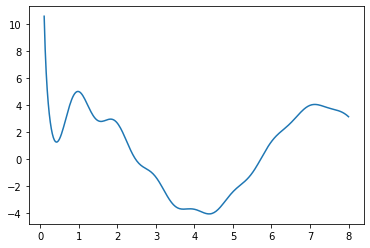

In [36]:
xx = np.linspace(0.1,8,300)
yy = [loss_function(x) for x in xx]
plt.plot(xx, yy)

In [37]:
# Initialize x_1 and x_2
x_1 = tf.Variable(6.0,float32)
x_2 = tf.Variable(0.3,float32)

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

for j in range(500):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())


6.121951 0.25


### Avoiding local minima
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as loss_function().


Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that x_1 and x_2 have been initialized to the same value this time. Furthermore, keras.optimizers.RMSprop() has also been imported for you from tensorflow.

#### Instructions

- Set the opt_1 operation to use a learning rate of 0.01 and a momentum of 0.99.
- Set opt_2 to use the root mean square propagation (RMS) optimizer with a learning rate of 0.01 and a momentum of 0.00.
- Define the minimization operation for opt_2.
- Print x_1 and x_2 as numpy arrays.

In [38]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,float32)
x_2 = Variable(0.05,float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.995)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(500):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

4.2598577 0.24519981


### Initialization in TensorFlow
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23. 
#### Instructions

- Initialize the layer 1 weights, w1, as a Variable() with shape [23, 7], drawn from a normal distribution.
- Initialize the layer 1 bias using ones.
- Use a draw from the normal distribution to initialize w2 as a Variable() with shape [7, 1].
- Define b2 as a Variable() and set its initial value to 0.0.

In [39]:
# Define the layer 1 weights
w1 = Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(tf.random.normal([7]))

# Define the layer 2 weights
w2 = Variable(tf.random.normal([7, 1]))

# Define the layer 2 bias
b2 = Variable(tf.random.normal([1]))

### Defining the model and loss function
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as borrower_features and default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as σ(layer1∗w2+b2), where σ is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

#### Instructions

- Apply a rectified linear unit activation function to the first layer.
- Apply 25% dropout to layer1.
- Pass the target, targets, and the predicted values, predictions, to the cross entropy loss function.

In [40]:
df = pd.read_csv('data/borrow.csv', header=None)
borrower_features = df.iloc[:2500,:-1].to_numpy().astype('float32')
default = df.iloc[:2500,-1].to_numpy().reshape([2500,1]).astype('float32')

test_features = df.iloc[2500:,:-1].to_numpy().astype('float32')
test_targets = df.iloc[2500:,-1].to_numpy().reshape([500,1]).astype('float32')

# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(tf.matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

### Training neural networks with TensorFlow
In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise. You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you. The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

#### Instructions

- Set the optimizer to perform minimization.
- Add the four trainable variables to var_list in the order in which they appear as arguments to loss_function().
- Use the model and test_features to predict the values for test_targets.

In [41]:
opt= tf.optimizers.Adam()

In [42]:
default.shape

(2500, 1)

In [43]:
from seaborn import heatmap
def confusion_matrix(default, model_predictions):
        df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), 
                       columns = ['Actual','Predicted'])
        confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], 
                                    rownames=['Actual'], colnames=['Predicted'])
        heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
        plt.show()

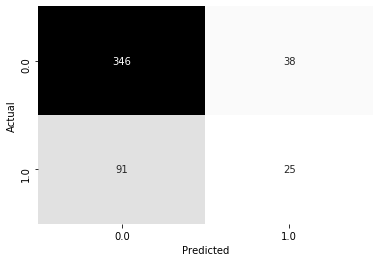

In [44]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

# 4. High Level APIs

In the final chapter, you'll use high-level APIs in TensorFlow 2.0 to train a sign language letter classifier. You will use both the sequential and functional Keras APIs to train, validate, make predictions with, and evaluate models. You will also learn how to use the Estimators API to streamline the model definition and training process, and to avoid errors.

In [45]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation = 'relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation= 'softmax'))

# Print the model architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


### Compiling a sequential model
In this exercise, you will work towards classifying letters from the Sign Language MNIST dataset; however, you will adopt a different network architecture than what you used in the previous exercise. There will be fewer layers, but more nodes. You will also apply dropout to prevent overfitting. Finally, you will compile the model to use the adam optimizer and the categorical_crossentropy loss. You will also use a method in keras to summarize your model's architecture. Note that keras has been imported from tensorflow for you and a sequential keras model has been defined as model.

#### Instructions

- In the first dense layer, set the number of nodes to 16, the activation to sigmoid, and the input_shape to (784,).
- Apply dropout at a rate of 25% to the first layer's output.
- Set the output layer to be dense, have 4 nodes, and use a softmax activation function.
- Compile the model using an adam optimizer and categorical_crossentropy loss function.

In [46]:
model1 = keras.Sequential()
# Define the first dense layer
model1.add(keras.layers.Dense(16, activation='sigmoid', input_shape = (784,)))

# Apply dropout to the first layer's output
model1.add(keras.layers.Dropout(0.25))

# Define the output layer
model1.add(keras.layers.Dense(4, activation = 'softmax'))

# Compile the model
model1.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_101 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 68        
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________
None


### Defining a multiple input model
In some cases, the sequential API will not be sufficiently flexible to accommodate your desired model architecture and you will need to use the functional API instead. If, for instance, you want to train two models with different architectures jointly, you will need to use the functional API to do this. In this exercise, we will see how to do this. We will also use the .summary() method to examine the joint model's architecture.

Note that keras has been imported from tensorflow for you. Additionally, the input layers of the first and second models have been defined as m1_inputs and m2_inputs, respectively. Note that the two models have the same architecture, but one of them uses a sigmoid activation in the first layer and the other uses a relu.

#### Instructions

- Pass model 1's input layer to its first layer and model 1's first layer to its second layer.
- Pass model 2's input layer to its first layer and model 2's first layer to its second layer.
- Use the add() operation to combine the second layers of model 1 and model 2.
- Complete the functional model definition.

In [47]:
m1_inputs = tf.keras.Input(shape = (784))
m2_inputs = tf.keras.Input(shape = (784))

In [48]:
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 12)           9420        input_1[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 12)           9420        input_2[0][0]                    
______________________________________________________________________________________________

### Training with Keras
In this exercise, we return to our sign language letter classification problem. We have 2000 images of four letters--A, B, C, and D--and we want to classify them with a high level of accuracy. We will complete all parts of the problem, including the model definition, compilation, and training.

Note that keras has been imported from tensorflow for you. Additionally, the features are available as sign_language_features and the targets are available as sign_language_labels.

#### Instructions

- Define a sequential model named model.
- Set the output layer to be dense, have 4 nodes, and use a softmax activation function.
- Compile the model with the SGD optimizer and categorical_crossentropy loss.
- Complete the fitting operation and set the number of epochs to 5.

In [49]:
mnist_df = pd.read_csv('data/slmnist.csv', header=None)
sign_language_features = mnist_df.iloc[:,1:].to_numpy().astype('float32')/255
sign_language_labels = pd.get_dummies(mnist_df.iloc[:,0]).to_numpy().astype('float32')

In [50]:
# Define a sequential model
model = keras.Sequential()

# Define a hidden layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(keras.layers.Dense(4,activation = 'softmax'))

# Compile the model
model.compile('SGD', loss='categorical_crossentropy')

# Complete the fitting operation
model.fit(sign_language_features, sign_language_labels, epochs=5)

Epoch 1/5
63/63 [==============================] - 0s 2ms/step - loss: 1.2960
Epoch 2/5
63/63 [==============================] - 0s 2ms/step - loss: 1.0951
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 0.8595
Epoch 4/5
63/63 [==============================] - 0s 3ms/step - loss: 0.6656
Epoch 5/5
63/63 [==============================] - 0s 4ms/step - loss: 0.5278


### Metrics and validation with Keras
We trained a model to predict sign language letters in the previous exercise, but it is unclear how successful we were in doing so. In this exercise, we will try to improve upon the interpretability of our results. Since we did not use a validation split, we only observed performance improvements within the training set; however, it is unclear how much of that was due to overfitting. Furthermore, since we did not supply a metric, we only saw decreases in the loss function, which do not have any clear interpretation.

Note that keras has been imported for you from tensorflow.

#### Instructions

- Set the first dense layer to have 32 nodes, use a sigmoid activation function, and have an input shape of (784,).
- Use the root mean square propagation optimizer, a categorical crossentropy loss, and the accuracy metric.
- Set the number of epochs to 10 and use 10% of the dataset for validation.

In [51]:
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(32, activation = 'sigmoid', input_shape = (784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Set the optimizer, loss function, and metrics
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Add the number of epochs and the validation split
model.fit(sign_language_features, sign_language_labels, epochs=30, validation_split=0.1)

Epoch 1/30
57/57 [==============================] - 1s 12ms/step - loss: 1.1168 - accuracy: 0.5739 - val_loss: 1.0051 - val_accuracy: 0.5350
Epoch 2/30
57/57 [==============================] - 0s 4ms/step - loss: 0.7546 - accuracy: 0.8161 - val_loss: 0.6265 - val_accuracy: 0.9700
Epoch 3/30
57/57 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.8867 - val_loss: 0.4949 - val_accuracy: 0.9700
Epoch 4/30
57/57 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.9144 - val_loss: 0.4661 - val_accuracy: 0.8650
Epoch 5/30
57/57 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.9439 - val_loss: 0.4153 - val_accuracy: 0.7800
Epoch 6/30
57/57 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.9567 - val_loss: 0.2534 - val_accuracy: 0.9650
Epoch 7/30
57/57 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.9667 - val_loss: 0.2159 - val_accuracy: 0.9650
Epoch 8/30
57/57 [=

### Overfitting detection
In this exercise, we'll work with a small subset of the examples from the original sign language letters dataset. A small sample, coupled with a heavily-parameterized model, will generally lead to overfitting. This means that your model will simply memorize the class of each example, rather than identifying features that generalize to many examples.

You will detect overfitting by checking whether the validation sample loss is substantially higher than the training sample loss and whether it increases with further training. With a small sample and a high learning rate, the model will struggle to converge on an optimum. You will set a low learning rate for the optimizer, which will make it easier to identify overfitting.

Note that keras has been imported from tensorflow.

#### Instructions

- Define a sequential model in keras named model.
- Add a first dense layer with 1024 nodes, a relu activation, and an input shape of (784,).
- Set the learning rate to 0.01.
- Set the fit() operation to iterate over the full sample 200 times and use 50% of the sample for validation purposes.

In [52]:
## Couldn't get ovverfitted
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(2048, activation = 'relu', input_shape = (784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Finish the model compilation
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the model fit operation
model.fit(sign_language_features, sign_language_labels, epochs=20, validation_split=0.5)


Epoch 1/20
32/32 [==============================] - 1s 40ms/step - loss: 11.4177 - accuracy: 0.3380 - val_loss: 0.9692 - val_accuracy: 0.7490
Epoch 2/20
32/32 [==============================] - 1s 37ms/step - loss: 0.7079 - accuracy: 0.7340 - val_loss: 0.6592 - val_accuracy: 0.7150
Epoch 3/20
32/32 [==============================] - 1s 37ms/step - loss: 0.3290 - accuracy: 0.9060 - val_loss: 0.2579 - val_accuracy: 0.9110ss: 0.3676 - accura
Epoch 4/20
32/32 [==============================] - 2s 57ms/step - loss: 0.1365 - accuracy: 0.9830 - val_loss: 0.1228 - val_accuracy: 0.9770
Epoch 5/20
32/32 [==============================] - 2s 47ms/step - loss: 0.0756 - accuracy: 0.9910 - val_loss: 0.0843 - val_accuracy: 0.9860
Epoch 6/20
32/32 [==============================] - 2s 53ms/step - loss: 0.0497 - accuracy: 0.9960 - val_loss: 0.0498 - val_accuracy: 0.9870
Epoch 7/20
32/32 [==============================] - 1s 30ms/step - loss: 0.0273 - accuracy: 0.9970 - val_loss: 0.0353 - val_accuracy: 

In [53]:
from sklearn.model_selection import train_test_split
train_features, test_features,train_labels, test_labels = train_test_split(sign_language_features[:200],
                                                                           sign_language_labels[:200],
                                                                          test_size = 0.5)

In [54]:
test_features.shape

(100, 784)

In [55]:
small_model = keras.Sequential()
small_model.add(keras.layers.Dense(8, activation = 'sigmoid',  input_shape = (784,)))
small_model.add(keras.layers.Dense(4, activation='softmax'))
small_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
              loss='categorical_crossentropy', metrics=['accuracy'])
small_model.fit(train_features, train_labels, epochs=50, verbose=0)

large_model = keras.Sequential()
large_model.add(keras.layers.Dense(64, activation = 'sigmoid',  input_shape = (784,)))
large_model.add(keras.layers.Dense(4, activation='softmax'))
large_model.compile(optimizer=keras.optimizers.Adam(lr=0.01), 
              loss='categorical_crossentropy', metrics=['accuracy'])
large_model.fit(train_features, train_labels, epochs=50, verbose=0)


In [56]:
### Again couldn't make it overfit jajaja
# Evaluate the small model using the train data
small_train = small_model.evaluate(train_features, train_labels)

# Evaluate the small model using the test data
small_test = small_model.evaluate(test_features, test_labels)

# Evaluate the large model using the train data
large_train = large_model.evaluate(train_features, train_labels)

# Evaluate the large model using the test data
large_test = large_model.evaluate(test_features, test_labels)

# Print losses
print('\n Small - Train: {}, Test: {}'.format(small_train, small_test))
print('Large - Train: {}, Test: {}'.format(large_train, large_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.8724 - accuracy: 0.4700

 Small - Train: [1.2972064018249512, 0.4699999988079071], Test: [1.3401468992233276, 0.3700000047683716]
Large - Train: [0.7829891443252563, 0.5600000023841858], Test: [0.872368335723877, 0.4699999988079071]


### Preparing to train with Estimators
For this exercise, we'll return to the King County housing transaction dataset from chapter 2. We will again develop and train a machine learning model to predict house prices; however, this time, we'll do it using the estimator API.

Rather than completing everything in one step, we'll break this procedure down into parts. We'll begin by defining the feature columns and loading the data. In the next exercise, we'll define and train a premade estimator. Note that feature_column has been imported for you from tensorflow. Additionally, numpy has been imported as np, and the Kings County housing dataset is available as a pandas DataFrame: housing.

#### Instructions

- Complete the feature column for bedrooms and add another numeric feature column for bathrooms. Use bedrooms and bathrooms as the keys.
- Create a list of the feature columns, feature_list, in the order in which they were defined.
- Set labels to be equal to the price column in housing.
- Complete the bedrooms entry of the features dictionary and add another entry for bathrooms.

In [57]:
housing = housing.drop('predictions', axis = 1)

In [58]:
# Define feature columns for bedrooms and bathrooms
bedrooms = tf.feature_column.numeric_column("bedrooms")
bathrooms = tf.feature_column.numeric_column("bathrooms")

# Define the list of feature columns
feature_list = [bedrooms, bathrooms]

def input_fn():
	# Define the labels
	labels = np.array(housing['price'])
	# Define the features
	features = {'bedrooms':np.array(housing['bedrooms']), 
                'bathrooms':np.array(housing['bathrooms'])}
	return features, labels

### Defining Estimators
In the previous exercise, you defined a list of feature columns, feature_list, and a data input function, input_fn(). In this exercise, you will build on that work by defining an estimator that makes use of input data.

#### Instructions
- Use a deep neural network regressor with 2 nodes in both the first and second hidden layers and 1 training step.
- Modify the code to use a LinearRegressor(), remove the hidden_units, and set the number of steps to 2.

In [59]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
# Define the model and set the number of steps
model = tf.estimator.DNNRegressor(feature_columns=feature_list, hidden_units=[2,2])
model.train(input_fn, steps=1)
# Define the model and set the number of steps
model = tf.estimator.LinearRegressor(feature_columns=feature_list)
model.train(input_fn, steps=2)